### Brooks Beckelman, Dallas Griffin

# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: Mon, October 24, by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Question 1 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01] . Plot MSE and the $w$ parameters as a function of epoch count.

## 1. Derive coefficient updates

For the purpose of this derivation, I will use the following cost function:

$$ cost(w, (x^{(i)}, y^{(i)})) = \frac{1}{2} * (\hat{y}^{(i)} - y^{(i)})^2 $$

where $i$ represents one sample from the data set, and $\hat{y}$ is represented by the following equation:

$$ \hat{y} = w_0 + w_1*x_1 + w_2*x_1^2 + w_3*x_2 $$

Thus, the cost function can be written as:

$$ cost(w, (x^{(i)}, y^{(i)})) = \frac{1}{2} * (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)})^2 $$

The coefficient update for each $w$ is defined as:

$$ w_j = w_j - \alpha * \frac{\partial}{\partial w_j}cost(w,(x^{(i)},y^{(i)}) $$

for $ j = 0, 1, 2, 3 $ where $\alpha$ is the learning rate.

The derivates of the cost function with respect to each coefficient are:

$$ \frac{\partial}{\partial w_0}cost(w_0,(x^{(i)},y^{(i)})) = (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_1}cost(w_1,(x^{(i)},y^{(i)})) = x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_2}cost(w_2,(x^{(i)},y^{(i)})) = 2*x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ \frac{\partial}{\partial w_3}cost(w_3,(x^{(i)},y^{(i)})) = x_2^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

Therefore, the coefficient updates for all 4 coefficients of the model are:

$$ w_0 = w_0 - \alpha * (w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_1 = w_1 - \alpha * x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_2 = w_2 - \alpha * 2*x_1^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

$$ w_3 = w_3 - \alpha * x_2^{(i)}*(w_0 + w_1*x_1^{(i)} + w_2*x_1^{(i)^2} + w_3*x_2^{(i)} - y^{(i)}) $$

where $\alpha$ is the learning rate and $i$ represents one sample from the data set. For stochastic gradient descent, the algorithm will iterate through each sample in the data set, updating the coefficients each time.

## 2. SGD Model

### Build class to perform stochastic gradient descent:

In [2]:
from sklearn.utils import shuffle

class StochasticGradientDescent:
    
    def __init__(self, learning_rate, num_iters):
        '''Allows user to import the desired learning rate and number of iterations/epochs'''
        self.learning_rate = learning_rate
        self.num_iters = num_iters
    
    def fit(self, X, y):
        '''Takes an array of x values, an array of the corresponding y values, a learning rate, and the number of iterations and 
            outputs a list of weights that have been optimized using stochastic gradient descent'''

        # Initialize coefficients
        weights = np.array([0]*4)
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        # Iterate through data set the number of times specified in input
        for epoch in range(self.num_iters):
            
            # Randomize order of data points before each epoch
            X_train, y_train = shuffle(X,y)
            
            # Iterate through each data point, updating the coefficients each time
            for i in range(len(X)):
                temp_x1 = X_train[i][0]
                temp_x2 = X_train[i][1]
                temp_y = y_train[i]
                alpha = self.learning_rate
                
                # Update coefficients
                temp_yhat = w0 + (w1*temp_x1) + (w2*temp_x1**2) + (w3*temp_x2)
                w0 = w0 - (temp_yhat - temp_y)*alpha
                w1 = w1 - (temp_yhat - temp_y)*temp_x1*alpha
                w2 = w2 - (temp_yhat - temp_y)*(temp_x1**2)*alpha
                w3 = w3 - (temp_yhat - temp_y)*temp_x2*alpha
                weights = [w0, w1, w2, w3]
        
        self.weights = weights

    def predict(self, X):
        '''Uses fitted SGD model to predict values of y for a given X array'''

        # Retrieve weights from fit
        weights = self.weights
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        
        y_pred = []
        # Make prediction for each sample in X
        for line in X:
            temp_x1 = float(line[0])
            temp_x2 = float(line[1])
            temp_yhat = w0 + (w1*temp_x1) + (w2*temp_x1**2) + (w3*temp_x2)
            # Add prediction to list of predictions
            y_pred.append(temp_yhat)
        
        self.y_pred = y_pred
        return y_pred

### Use gradient descent class to predict data given in 'samples.csv':

In [3]:
# Read in data
samples = pd.read_csv('samples.csv')[['x1', 'x2', 'y']]

# Separate data into an X array and y array to input in SGD class
X, y = np.array(samples[['x1', 'x2']]), np.array(samples['y'])

In [4]:
from sklearn.metrics import mean_squared_error as MSE

# Define paramaters to be examined
## Learning rate
alphas = [0.0001, 0.001, 0.01]
## Number of epochs
num_iters = range(1,11)

# Initialize lists to store MSE and weights after each iteration
## MSE
MSE0001_list = []
MSE001_list = []
MSE01_list = []
## Weights
weights0001_list = []
weights001_list = []
weights01_list = []

# Iterate through epochs, fit SGD, and make predictions for X
for itera in num_iters:
    # Learning rate of 0.0001
    fit0001 = StochasticGradientDescent(alphas[0], itera)
    fit0001.fit(X, y)
    predict0001 = fit0001.predict(X)
    
    # Learning rate of 0.001
    fit001 = StochasticGradientDescent(alphas[1], itera) 
    fit001.fit(X, y)
    predict001 = fit001.predict(X)
    
    # Learning rate of 0.01
    fit01 = StochasticGradientDescent(alphas[2], itera) 
    fit01.fit(X, y)
    predict01 = fit01.predict(X)
    
    # Append weights for each model to lists
    weights0001_list.append(fit0001.weights)
    weights001_list.append(fit001.weights)
    weights01_list.append(fit01.weights)
    
    # Calculate MSE for each model and append to lists
    MSE0001_list.append(MSE(y, predict0001))
    MSE001_list.append(MSE(y, predict001))
    MSE01_list.append(MSE(y, predict01))

# Convert weights lists to arrays
weights0001_array = np.array(weights0001_list)
weights001_array = np.array(weights001_list)
weights01_array = np.array(weights01_list)

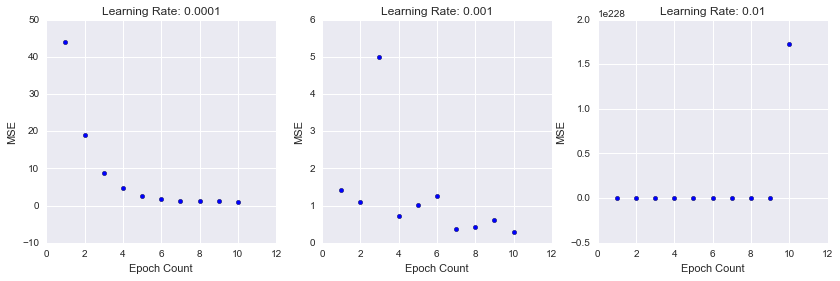

In [5]:
# Plot MSE as a function of epoch count for each model 
figure(figsize=(14,4))

subplot(131)
scatter(num_iters, MSE0001_list)
title('Learning Rate: 0.0001')
xlabel('Epoch Count')
ylabel('MSE')

subplot(132)
scatter(num_iters, MSE001_list)
title('Learning Rate: 0.001')
xlabel('Epoch Count')
ylabel('MSE')

subplot(133)
scatter(num_iters, MSE01_list)
title('Learning Rate: 0.01')
xlabel('Epoch Count')
ylabel('MSE')

In [6]:
# Create dataframes out weight arrays for easier plotting 
df_weights0001 = DataFrame(weights0001_array)
df_weights0001.columns = ['w0', 'w1', 'w2', 'w3']

df_weights001 = DataFrame(weights001_array)
df_weights001.columns = ['w0', 'w1', 'w2', 'w3']

df_weights01 = DataFrame(weights01_array)
df_weights01.columns = ['w0', 'w1', 'w2', 'w3']

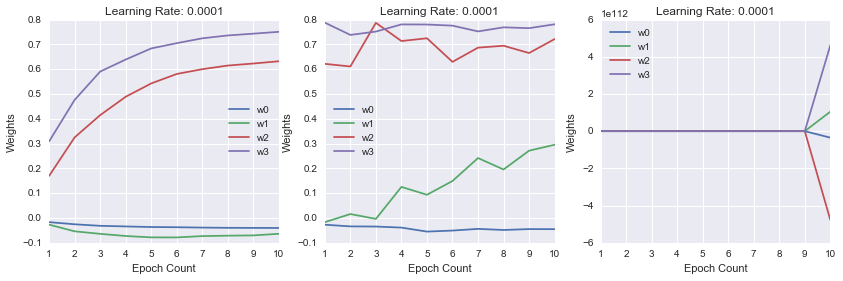

In [7]:
epochs = range(1,11)

# Plot weights as a function of epoch count for each model
figure(figsize=(14,4))

subplot(131)
plot(epochs, df_weights0001['w0'])
plot(epochs, df_weights0001['w1'])
plot(epochs, df_weights0001['w2'])
plot(epochs, df_weights0001['w3'])
xlabel('Epoch Count')
ylabel('Weights')
title('Learning Rate: 0.0001')
legend(loc = 'best')

subplot(132)
plot(epochs, df_weights001['w0'])
plot(epochs, df_weights001['w1'])
plot(epochs, df_weights001['w2'])
plot(epochs, df_weights001['w3'])
xlabel('Epoch Count')
ylabel('Weights')
title('Learning Rate: 0.0001')
legend(loc = 'best')

subplot(133)
plot(epochs, df_weights01['w0'])
plot(epochs, df_weights01['w1'])
plot(epochs, df_weights01['w2'])
plot(epochs, df_weights01['w3'])
xlabel('Epoch Count')
ylabel('Weights')
title('Learning Rate: 0.0001')
legend(loc = 'best')

# Question 2: Gradient Descent (5 pts)

Suppose we are trying to use gradient descent to minimize a cost function y = f(w) as shown in the figure below. This function is linearly decreasing between A and B, constant between B and C, quadratic between C and D and constant between D and E. Assume that we have 10000 data points in our training set. If we choose the starting point between B and C, will we be able to find the local minima? Explain your answer. If your answer is "Yes", can you give a bound on the number of iterations required to get to the local minima?

<img src="sgd.png">

If we are using batch gradient descent and the starting point is between B and C, then we will not be able to find the local minima in this instance. Batch gradient descent works by iterating through an entire data set and updating the coefficients of some function to minimize the associated cost function after each iteration. The formula that is used to update the coefficient $w$ is shown below:

$$ w = w - \alpha*\frac{\partial}{\partial w}J(w) $$

In this formula, $w$ represents the coefficient that is being updated, $\alpha$ represents the learning rate, and $J(w)$ represents the cost function. The change in the coefficient is directly proportional to the derivative of the cost function with respect to the coefficient. If we start between B and C, the derivative of the cost function with respect to $w$ is zero. Therefore, the second term in the above function is zero, and $w$ remains unchanged regardless of how many iterations are performed.

However, if we are using stochastic gradient descent, the coefficients are updated after each data point rather than after each epoch. In this case, it would be possible for us to approach the local minima because the data points are randomized and the starting point does not matter to a large degree. 

# Question 3: Multi-layer Perceptron regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the same dataset used in HW2 Q5: Hitters.csv [here](https://rdrr.io/cran/ISLR/man/Hitters.html). 

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**:

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Hitters.csv')
label_name = 'Salary'
y = data[label_name]
X = data.drop(label_name,axis=1)
print X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

(263, 16)


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

1) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.001
    
Now, consider two different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a) and (b) (6pts)
   
   
2) Now, using the same parameters used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works better, (a) or (b)? Briefly analyze the result in terms of the number of hidden units. (5pts)


3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each iteration. For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot two curves for model (a) and (b) in one figure, where *X-axis* is iteration number and *Y-axis* is squared root of *loss\_curve\_* value. (4pts)

In [9]:
# Scale and center features
X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_train = DataFrame(X_train)

X_test = X_scaler.transform(X_test)
X_test = DataFrame(X_test)

## 1) 5-Fold Cross Validation

In [10]:
# Define parameters for each model

## hidden_layer_sizes = (2,)
mlp2 = MLPRegressor(hidden_layer_sizes=(2,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42, 
                   batch_size=40, learning_rate_init=0.001)

## hidden_layer_sizes = (15,)
mlp15 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=40, learning_rate_init=0.001)

In [11]:
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)

RMSE2 = []
RMSE15 = []

for train, test in kf.split(X_train):
    # Fit models
    mlp2.fit(X_train.iloc[train], y_train.iloc[train])
    mlp15.fit(X_train.iloc[train], y_train.iloc[train])
    
    y2_predict = mlp2.predict(X_train.iloc[test])
    y2_true = y_train.iloc[test]
    y15_predict = mlp15.predict(X_train.iloc[test])
    y15_true = y_train.iloc[test]
    
    MSE2 = mean_squared_error(y2_true, y2_predict)
    MSE15 = mean_squared_error(y15_true, y15_predict)
    
    RMSE2.append(MSE2**.5)
    RMSE15.append(MSE15**.5)

In [12]:
print 'Average Root Mean Squared Error (RMSE) from 5-Fold Cross Validation'
print 
print 'Hidden layers = 2\t:\t{}'.format(np.mean(RMSE2))
print 'Hidden layers = 15\t:\t{}'.format(np.mean(RMSE15))

Average Root Mean Squared Error (RMSE) from 5-Fold Cross Validation

Hidden layers = 2	:	409.788162201
Hidden layers = 15	:	310.867520821


## 2) Train regressor on whole training set

In [13]:
mlp2.fit(X_train, y_train)
mlp15.fit(X_train, y_train)

predict2_train = mlp2.predict(X_train)
predict2_test = mlp2.predict(X_test)

predict15_train = mlp15.predict(X_train)
predict15_test = mlp15.predict(X_test)

rmse2_train = mean_squared_error(y_train, predict2_train)**.5
rmse2_test = mean_squared_error(y_test, predict2_test)**.5

rmse15_train = mean_squared_error(y_train, predict15_train)**.5
rmse15_test = mean_squared_error(y_test, predict15_test)**.5

print 'HIDDEN LAYERS = 2'
print 'Train RMSE\t:\t{}'.format(rmse2_train)
print 'Test RMSE\t:\t{}'.format(rmse2_test)
print 
print 'HIDDEN LAYERS = 15'
print 'Train RMSE\t:\t{}'.format(rmse15_train)
print 'Test RMSE\t:\t{}'.format(rmse15_test)

HIDDEN LAYERS = 2
Train RMSE	:	364.368091219
Test RMSE	:	486.722986238

HIDDEN LAYERS = 15
Train RMSE	:	300.095370331
Test RMSE	:	412.637972754


Just as we saw from the 5-fold cross validation, the model with 15 hidden layers performed better than the model with 2 hidden layers. The model with 15 layers resulted in a better predictive accuracy for both the training set and the test set. The addition of the extra hidden layers allows the model to learn the complexity of the training data better. This also clearly does not result in overfitting the training data as the model with more hiddlen layers has better predictive accuracy on the test set.

## 3) Plot loss curves

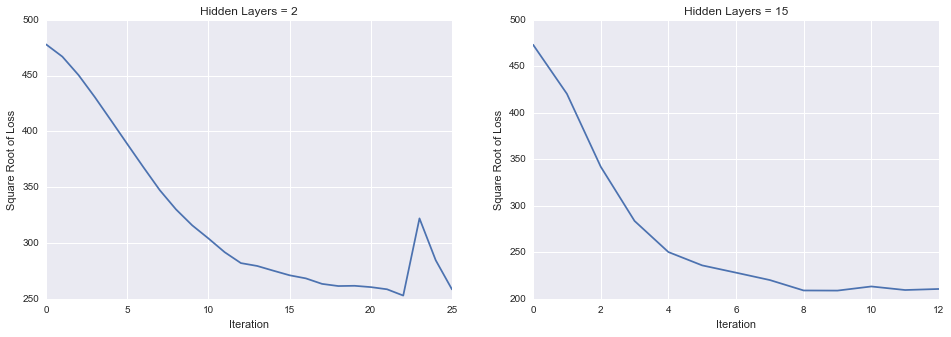

In [14]:
figure(figsize = (16,5))

subplot(121)
plot(np.sqrt(mlp2.loss_curve_))
title('Hidden Layers = 2')
xlabel('Iteration')
ylabel('Square Root of Loss')

subplot(122)
plot(np.sqrt(mlp15.loss_curve_))
title('Hidden Layers = 15')
xlabel('Iteration')
ylabel('Square Root of Loss')

# Question 4 - Bayesian Classifiers (10 pts)

Download the Smarket dataset from Canvas. This contains about four years worth of daily prices for one stock. The goal is to predict whether or not the stock price will go up or down, and the features are the stock prices of the last five days.  
The code below loads the dataset and all necessary sklearn modules (not that you can't use more if you feel like it). Look up any module on the scikit-learn website for a full description.

1. The last 50 points will be the test dataset. For training, use the 1000 points prior to these 50 test points.
2. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the stock price going up for each row in the test set.
3. Plot the receiver operating characteristic (ROC) curve of each model, using the extracted probabilities and the true values for the test set. (3 pts)
4. Report the area under the ROC curve (AUC) for each model. (2 pts)
6. Justify the performance of each model, relative to the others. (1 pts)
7. Repeat steps 1-6, only using the prior 100 points for training. Explain the changes in model performance. (4 pts)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
data = pd.read_csv('Smarket.csv', usecols=['Lag1','Lag2','Lag3','Lag4','Lag5','Direction'])

## 1. Split data into training and test set

In [16]:
train = data[-1050:-50]
X_train = train.drop('Direction', axis=1)
y_train = train['Direction']

test = data[-50:]
X_test = test.drop('Direction', axis=1)
y_test = test['Direction']

## 2. Train LDA, QDA, and Naive Bayes

In [17]:
# Train LDA model 
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_probs = LDA_model.predict_proba(X_test)

# Train QDA model
QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_probs = QDA_model.predict_proba(X_test)

# Traine Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_probs = NB_model.predict_proba(X_test)

In [18]:
def extract_probs(probs_array):
    probs_down = []
    probs_up = []
    for row in probs_array:
        probs_down.append(row[0])
        probs_up.append(row[1])
    
    return probs_up, probs_down

In [19]:
LDA_probsUp, LDA_probsDown = extract_probs(LDA_probs)
QDA_probsUp, QDA_probsDown = extract_probs(QDA_probs)
NB_probsUp, NB_probsDown = extract_probs(NB_probs)

LDA_probsUp[:5]

[0.50495138668713124,
 0.53888530608011354,
 0.54603080014781469,
 0.48018947654562905,
 0.50410137409817912]

## 3. Receiver operating characteristic (ROC) curves

In [20]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_test, LDA_probsUp, pos_label='Up')
QDA_fpr, QDA_tpr, QDA_thresholds = roc_curve(y_test, QDA_probsUp, pos_label='Up')
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_probsUp, pos_label='Up')

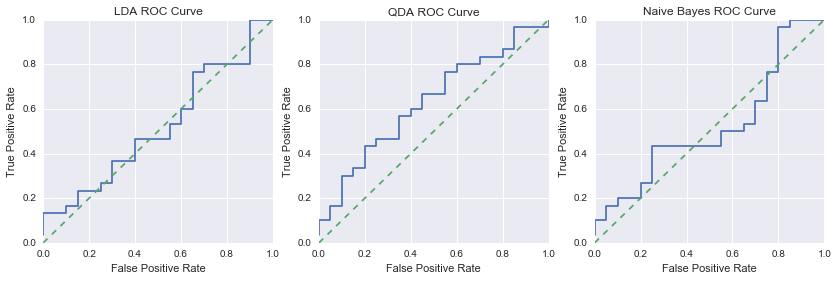

In [21]:
x = [0,1]
y = [0,1]

figure(figsize=(14,4))

subplot(131)
plot(LDA_fpr, LDA_tpr)
plot(x,y, ls='--')
title('LDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(132)
plot(QDA_fpr, QDA_tpr)
plot(x,y, ls='--')
title('QDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(133)
plot(NB_fpr, NB_tpr)
plot(x,y, ls='--')
title('Naive Bayes ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

## 4. Area under ROC curves

In [22]:
y_test_bin = []
for y in y_test:
    if y == 'Up':
        y_test_bin.append(1)
    else:
        y_test_bin.append(0)

In [23]:
LDA_auc = roc_auc_score(y_test_bin, LDA_probsUp)
QDA_auc = roc_auc_score(y_test_bin, QDA_probsUp)
NB_auc = roc_auc_score(y_test_bin, NB_probsUp)

In [24]:
print 'Area Under ROC Curve'
print
print 'LDA\t\t:\t%f' % (LDA_auc)
print 'QDA\t\t:\t%f' % (QDA_auc)
print 'Naive Bayes\t:\t%f' % (NB_auc)

Area Under ROC Curve

LDA		:	0.520000
QDA		:	0.628333
Naive Bayes	:	0.521667


## 5. Justify performance of each model

The Quadratic Discriminant Analysis clearly outperformed the other two models. The Linear Discriminant Analysis and Naive Bayes models both produced ROC curves with an AUC of about 0.52. This is only slightly better than you would theoretically get by flipping a coin. QDA performed much better, with an area under the curve of about 0.63.

The fact that QDA outperforms LDA in this case likely indicates that there is not a clear linear boundary separating the two classes in the dimensional space. QDA has the ability to learn quadratic boundaries where LDA does not, so it is more flexible and can find a more appropriate non-linear boundary in this case. Naive Bayes does not perform well because it is not able to gain much information from the likelihood values, and is thus forced to rely heavily on the priors to estimate the posterior probabilities.

## 6. Use prior 100 points for training

In [25]:
train = data[-150:-50]
X_train = train.drop('Direction', axis=1)
y_train = train['Direction']

test = data[-50:]
X_test = test.drop('Direction', axis=1)
y_test = test['Direction']

In [26]:
# Train LDA model 
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_probs = LDA_model.predict_proba(X_test)

# Train QDA model
QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_probs = QDA_model.predict_proba(X_test)

# Traine Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_probs = NB_model.predict_proba(X_test)

# Extract probabilities
LDA_probsUp, LDA_probsDown = extract_probs(LDA_probs)
QDA_probsUp, QDA_probsDown = extract_probs(QDA_probs)
NB_probsUp, NB_probsDown = extract_probs(NB_probs)

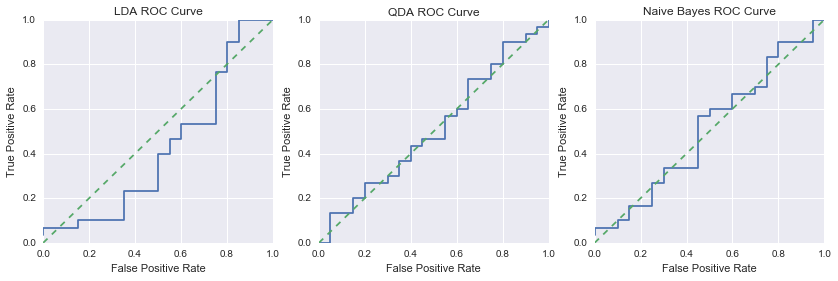

In [27]:
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_test, LDA_probsUp, pos_label='Up')
QDA_fpr, QDA_tpr, QDA_thresholds = roc_curve(y_test, QDA_probsUp, pos_label='Up')
NB_fpr, NB_tpr, NB_thresholds = roc_curve(y_test, NB_probsUp, pos_label='Up')

x = [0,1]
y = [0,1]

figure(figsize=(14,4))

subplot(131)
plot(LDA_fpr, LDA_tpr)
plot(x,y, ls='--')
title('LDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(132)
plot(QDA_fpr, QDA_tpr)
plot(x,y, ls='--')
title('QDA ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

subplot(133)
plot(NB_fpr, NB_tpr)
plot(x,y, ls='--')
title('Naive Bayes ROC Curve')
xlabel('False Positive Rate')
ylabel('True Positive Rate')

In [28]:
LDA_auc = roc_auc_score(y_test_bin, LDA_probsUp)
QDA_auc = roc_auc_score(y_test_bin, QDA_probsUp)
NB_auc = roc_auc_score(y_test_bin, NB_probsUp)

print 'Area Under ROC Curve'
print
print 'LDA\t\t:\t%f' % (LDA_auc)
print 'QDA\t\t:\t%f' % (QDA_auc)
print 'Naive Bayes\t:\t%f' % (NB_auc)

Area Under ROC Curve

LDA		:	0.421667
QDA		:	0.508333
Naive Bayes	:	0.508333


### Changes in Model Performance:

All three models (LDA, QDA, Naive Bayes) performed worse when using only the prior 100 points than they did when using the prior 1,000 points. Quadratic Discriminant Analysis and Naive Bayes both performed only about as well as flipping a coin, and Linear Discriminant Analysis actually performed much worse. As one would expect, using fewer data points to train the models resulted in poorer performance. For LDA and QDA, having an order of magnitude fewer points in a large dimensional space makes it increasingly difficult to discern an accurate boundary for splitting the two classes. Since we saw earlier that a much larger sample did not even have a clear linear boundary, this makes things exceptionally difficult for the LDA classifier.

For Naive Bayes, the model performs only slightly worse with 100 data points in the training set than it does with 1,000 points. This is likely because the model was already not performing very well and with viewer data points, there are fewer priors to train off of. 

# Question 5 - Logistic Regression (15pts)

In this question we will be predicting mile per gallon (mpg) for Auto data set. ('Auto.csv' in Canvas)
1. Convert mpg to a binary variable mpg01 which is 1 if had an mpg is greater than median mpg and zero otherwise
2. Split the data into training and test. Use 42 as random seed and use 1/3rd of the data for testing. Our y variable is mpg01 and X matrix includes all the other variables except mpg01.
3. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "mpg01 = 0" class, the "mpg01 = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.
4. Repeat step 3 except use l2 penalty with Cs of [0.001,0.01, 0.1, 1, 10 ,100, 1000]. You will want to use k-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).
5. Repeat question 4 except use l1 instead of l2 as the penalty type, use Cs of  [0.001, 0.01, ..., 1000]
6. Which model produces the best average per-class accuracy? Why do you think this is the case? How do the models handle the different classes, and why is this so?

Following code will load and clean the dataset and load some useful functions

In [30]:
import pandas as pd
import numpy as np

from sklearn import model_selection
# from sklearn import model_selection # Use model_selection instead of cross_validation in sklearn version >=0.18
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, make_scorer
from sklearn.grid_search import GridSearchCV

Auto = pd.read_csv('Auto.csv', na_values='?').drop('name',axis = 1).dropna()
Auto.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## 1. Convert mpg to binary variable

In [31]:
Auto['mpg01'] = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
Auto = Auto.drop('mpg', axis=1)
Auto.head(1)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130.0,3504,12.0,70,1,0


## 2. Split data into training and test set

In [32]:
# Split data into training and test sets
train, test = model_selection.train_test_split(Auto, test_size = 0.33, random_state = 42)
 
X_train = train.drop('mpg01', axis=1)
y_train = train['mpg01']

X_test = test.drop('mpg01', axis=1)
y_test = test['mpg01']

## 3. Logistic regression with almost no regularization

In [33]:
# Fit logistic regression classifier to training set
logreg = LogisticRegression(penalty='l2', C=1e6)
logreg.fit(X_train, y_train)

# Use classifier to predict test set
logreg_predict = logreg.predict(X_test)

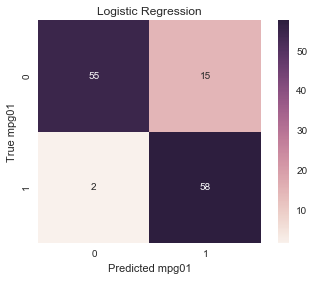

In [34]:
# Confustion matrix on test data
conf_mat = confusion_matrix(y_test, logreg_predict)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Predicted mpg01')
plt.ylabel('True mpg01')
plt.title('Logistic Regression')

In [35]:
true_mpg0 = float(conf_mat[0][0])
false_mpg0 = float(conf_mat[1][0])
true_mpg1 = float(conf_mat[1][1])
false_mpg1 = float(conf_mat[0][1])

accuracy_mpg0 = true_mpg0 / (true_mpg0 + false_mpg1)
accuracy_mpg1 = true_mpg1 / (true_mpg1 + false_mpg0)

avgAcc_perClass = (accuracy_mpg1 + accuracy_mpg0)/2

In [36]:
print 'Class Accuracy'
print
print 'mpg01 = 0\t:\t%f' % (accuracy_mpg0)
print 'mpg01 = 1\t:\t%f' % (accuracy_mpg1)
print 'Average\t\t:\t%f' % (avgAcc_perClass)

Class Accuracy

mpg01 = 0	:	0.785714
mpg01 = 1	:	0.966667
Average		:	0.876190


## 4. l2 penalty, Cs of [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [37]:
def custom_scorer(y_true, y_predict):
    '''Takes true values of y and predicted values of y and returns average per class accuracy'''
    conf_mat = confusion_matrix(y_true, y_predict)
    
    true_neg = float(conf_mat[0][0])
    false_neg = float(conf_mat[1][0])
    true_pos = float(conf_mat[1][1])
    false_pos = float(conf_mat[0][1])
    
    accuracy_neg = true_neg / (true_neg + false_pos)
    accuracy_pos = true_pos / (true_pos + false_neg)
    
    avg_accuracy_perClass = (accuracy_pos + accuracy_neg)/2
    return avg_accuracy_perClass

In [38]:
# Define scoring function
score = make_scorer(custom_scorer, greater_is_better=True)

# Define parameter grid
parameters = {'C': [0.001,0.01, 0.1, 1, 10 ,100, 1000]}

# Fit logistic regression model with different parameters
cv_l2 = GridSearchCV(LogisticRegression(penalty='l2'), parameters,cv=5, scoring=score)
cv_l2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(custom_scorer), verbose=0)

In [39]:
bestScore_l2 = cv_l2.best_score_
bestParams_l2 = cv_l2.best_params_

print 'The logistic regression model performed best with C = %.2f.' % (bestParams_l2['C'])
print 'This model produced an average per class accuracy of %f.' % (bestScore_l2)

The logistic regression model performed best with C = 0.01.
This model produced an average per class accuracy of 0.922975.


## 5. l1 penalty, Cs of [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [40]:
# Fit logistic regression model with different parameters
cv_l1 = GridSearchCV(LogisticRegression(penalty='l1'), parameters, cv=5, scoring=score)
cv_l1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(custom_scorer), verbose=0)

In [41]:
bestScore_l1 = cv_l1.best_score_
bestParams_l1 = cv_l1.best_params_

print 'The logistic regression model performed best with C = %i.' % (bestParams_l1['C'])
print 'This model produced an average per class accuracy of %f.' % (bestScore_l1)

The logistic regression model performed best with C = 10.
This model produced an average per class accuracy of 0.926944.


## 6. Compare models

The model that produced the best average per class accuracy was the logistic regression with an 'l1' penalty type and C = 10. A higher C-value indicates less regularization, which means a greater chance that your model will overfit. Our original model (C = 1,000,000) was probably overfitting significantly. By lowering C to 10, this new model does not overfit and is able to more accurately classify the out-of-sample set. Furthermore, using lasso (l1) rather than ridge (l2) shrinks some parameter coefficients to zero to further reduce overfitting. 

However, you do not want to do too much regularization because, at some point, you may be losing information that is actually powerful in predicting out-of-sample. This is likely why C = 10 performed better than the lower C-values when 'l1' penalty was used. Lasso shrinks some coefficients much quicker than ridge does. Therefore, a lower regularization strength may yield better results because it prevents lasso from shrinking important parameter coefficients to zero. In this case, C = 10 seems to be the sweet spot between overfitting with too many parameters and underfitting by removing too many parameters.

# Question 6: House Prices (kaggle competition) (25 pts)

In this problem, we are going to explore a kaggle competition: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Your goal is to obtain the best score you can in this competition. This is an ongoing competition, and you have the opportunity to win the prize money! 

The first step is to make a Kaggle account. Then find the House Prices competition and read the competition details and the description of the dataset. You may find this [article](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) useful.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
2. Predictive Models. 
 * You have to create at least three models: simple linear regression, Lasso and Ridge regression and multilayer perceptron. You may consider creating an ensemble of these models as well (optional). For Lasso and Ridge regression, optimize the alphas using cross validation. You may try other predictive models to get better scores (optional).
3. Evaluation: submit your model to kaggle submission site and report the public score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

### Data Pre-Processing

In [133]:
housedata = pd.read_csv('kaggle_train.csv')

#Describe raw dataset
housedata.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [134]:
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

#Drop ID Column
#Drop columns because not enough data= 'PoolQC','MiscFeature','Alley'
#Drop columns because few distinct classes = Street, Condition2, RooftMatl, Heating, Utilities
housedata = housedata.drop(['Id','PoolQC','MiscFeature','Alley','Street','Condition2','RoofMatl','Heating','Utilities'], 1)

#Convert MoSold to categorical
housedata["MoSold"] = housedata['MoSold'].astype(str)

#Convert PoolArea to binary due to low # (6) and low sqft variation 
housedata["Pool"] = np.where(housedata['PoolArea'] > 0, 1, 0)
housedata = housedata.drop('PoolArea',1)

#***Replace NA's w/ Zero
housedata.fillna(0, inplace=True)

#Rename Columns that start w/ numbers
housedata.rename(columns={'1stFlrSF':'SFFlr1', '2ndFlrSF':'SFFlr2', '3SsnPorch':'PorchSsn3'},inplace=True)

#Describe processed dataframe
housedata.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,SFFlr1,SFFlr2,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PorchSsn3,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1460.0,1460,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460,1460.000000,1460,1460,1460.000000,1460.000000
unique,NaN,5,NaN,NaN,4,4,5,3,25,9,5,8,NaN,NaN,NaN,NaN,6,15,16,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6.0,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,5.0,NaN,12,NaN,9,6,NaN,NaN
top,NaN,RL,NaN,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,0.0,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6,NaN,WD,Normal,NaN,NaN
freq,NaN,1151,NaN,NaN,925,1311,1052,1382,225,1260,1220,726,NaN,NaN,NaN,NaN,1141,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,690.0,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,1179.0,NaN,253,NaN,1267,1198,NaN,NaN
mean,56.897260,NaN,57.623288,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1868.739726,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,NaN,43.489041,NaN,2007.815753,NaN,NaN,180921.195890,0.004795
std,42.300571,NaN,34.664304,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,453.697295,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,NaN,496.123024,NaN,1.328095,NaN,NaN,79442.502883,0.069100
min,20.000000,NaN,0.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,2006.000000,NaN,NaN,34900.000000,0.000000
25%,20.000000,NaN,42.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000,1967.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,223.000000,795.750000,NaN,NaN,NaN,8

### Predictive Models

#### OLS Regression

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from patsy import dmatrices

#Format predictors for input into Patsy
x_val = list(housedata.drop('SalePrice', axis=1).columns.values)
x_input = ' + '.join(map(str, x_val))

#Create design matrices
y, x = dmatrices('SalePrice ~ '+x_input, data = housedata, return_type = 'dataframe')

#Split data into train & test sets
x_train, x_test = train_test_split(x, test_size = 0.33, random_state = 42)
y_train, y_test = train_test_split(y, test_size = 0.33, random_state = 42)

# Fit MLR on training set
mlr = LinearRegression()
mlr_house = mlr.fit(x_train, y_train)

# Prediction based on training & test sets
mlr_house_pred_train = mlr_house.predict(x_train)
mlr_house_pred_test = mlr_house.predict(x_test)

# Evaluate in and out of sample performance
MSE_train = mean_squared_error(y_train, mlr_house_pred_train)
RMSE_train = sqrt(MSE_train)

MSE_test = mean_squared_error(y_test, mlr_house_pred_test)
RMSE_test = sqrt(MSE_test)

print 'OLS Regression RMSE - Train: ', RMSE_train
print 'OLS Regression RMSE - Test: ', RMSE_test

OLS Regression RMSE - Train:  22790.4731915
OLS Regression RMSE - Test:  35863.7310574


#### Ridge & Lasso Regression

In [179]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score

# Set range of values for alpha (regularization paramater)
alphas = 10**np.linspace(10,-2,100)*0.5

# Initialize regression models
lasso = Lasso()
ridge = Ridge()

# Set number of cross-validation folds
n_folds = 5

# Create empty lists to store mean-squared errors and standard deviations for each alpha value
lasso_scores = list()
lasso_std = list()
ridge_scores = list()
ridge_std = list()
# Fill lists with average mean-squared error for each cross validation
for alpha in alphas:
    lasso.alpha = alpha
    ridge.alpha = alpha
    lasso_score = cross_val_score(lasso, x_train, y_train, cv=n_folds, scoring='neg_mean_squared_error')
    ridge_score = cross_val_score(ridge, x_train, y_train, cv=n_folds, scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(lasso_score))
    lasso_std.append(np.std(lasso_score))
    ridge_scores.append(np.mean(ridge_score))
    ridge_std.append(np.std(ridge_score))

lasso_scores, lasso_std = np.array(lasso_scores)*-1, np.array(lasso_std)*-1
ridge_scores, ridge_std = np.array(ridge_scores)*-1, np.array(ridge_std)*-1

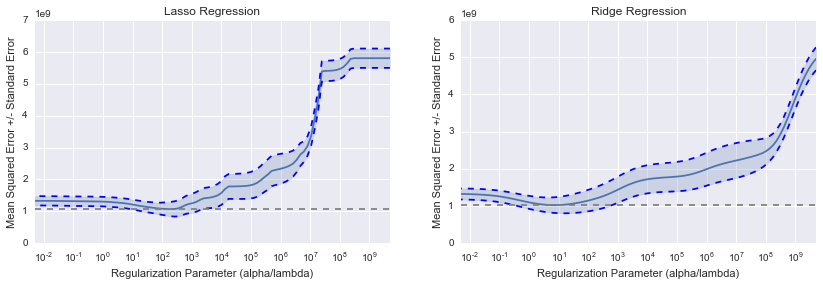

In [180]:
plt.figure(figsize=(14,4))

# Plot MSE vs. alpha for lasso regression
plt.subplot(121)
plt.semilogx(alphas, lasso_scores)
lasso_stdError = lasso_std / np.sqrt(n_folds)
plt.semilogx(alphas, lasso_scores + lasso_stdError, 'b--')
plt.semilogx(alphas, lasso_scores - lasso_stdError, 'b--')
plt.fill_between(alphas, lasso_scores + lasso_stdError, lasso_scores - lasso_stdError, alpha=0.2)
plt.axhline(np.min(lasso_scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])
xlabel('Regularization Parameter (alpha/lambda)')
ylabel('Mean Squared Error +/- Standard Error')
title('Lasso Regression')

# Plot MSE vs. alpha for ridge regression
plt.subplot(122)
plt.semilogx(alphas, ridge_scores)
ridge_stdError = ridge_std / np.sqrt(n_folds)
plt.semilogx(alphas, ridge_scores + ridge_stdError, 'b--')
plt.semilogx(alphas, ridge_scores - ridge_stdError, 'b--')
plt.fill_between(alphas, ridge_scores + ridge_stdError, ridge_scores - ridge_stdError, alpha=0.2)
plt.axhline(np.min(ridge_scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])
xlabel('Regularization Parameter (alpha/lambda)')
ylabel('Mean Squared Error +/- Standard Error')
title('Ridge Regression')

In [181]:
lasso_alpha = alphas[np.argmin(lasso_scores)]
ridge_alpha = alphas[np.argmin(ridge_scores)]
print 'Best Lambdas'
print 'Lasso Regression :', lasso_alpha
print 'Ridge Regression :', ridge_alpha

Best Lambdas
Lasso Regression : 201.85086293
Ridge Regression : 7.08737081463


In [182]:
# LASSO
lasso_house = Lasso(alpha = lasso_alpha)
#Fit on training set
lasso_house.fit(x_train, y_train)

# Prediction based on training & test sets
lasso_house_pred_train = lasso_house.predict(x_train)
lasso_house_pred_test = lasso_house.predict(x_test)

# Evaluate in and out of sample performance
lasso_MSE_train = mean_squared_error(y_train, lasso_house_pred_train)
lasso_RMSE_train = sqrt(lasso_MSE_train)

lasso_MSE_test = mean_squared_error(y_test, lasso_house_pred_test)
lasso_RMSE_test = sqrt(lasso_MSE_test)

print 'Lasso RMSE - Train: ', lasso_RMSE_train
print 'Lasso RMSE - Test: ', lasso_RMSE_test

Lasso RMSE - Train:  26043.879462
Lasso RMSE - Test:  32863.3650373


In [183]:
# RIDGE
ridge_house = Ridge(alpha = ridge_alpha)
#Fit on training set
ridge_house.fit(x_train, y_train)

# Prediction based on training & test sets
ridge_house_pred_train = ridge_house.predict(x_train)
ridge_house_pred_test = ridge_house.predict(x_test)

# Evaluate in and out of sample performance
ridge_MSE_train = mean_squared_error(y_train, ridge_house_pred_train)
ridge_RMSE_train = sqrt(ridge_MSE_train)

ridge_MSE_test = mean_squared_error(y_test, ridge_house_pred_test)
ridge_RMSE_test = sqrt(ridge_MSE_test)

print 'Ridge RMSE - Train: ', ridge_RMSE_train
print 'Ridge RMSE - Test: ', ridge_RMSE_test

Ridge RMSE - Train:  24175.5718277
Ridge RMSE - Test:  33092.6523035


#### Multilayer Perceptron

In [277]:
#Define model parameters
mlp_house = MLPRegressor(activation = 'relu', solver = 'lbfgs', learning_rate='constant',\
                         random_state=42, learning_rate_init = 0.001,hidden_layer_sizes = (200,))

#Scale Data
scaler = StandardScaler()  
scaler.fit(x_train)  
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test) 

mlp_house.fit(x_train_scale, y_train)

# Prediction based on training & test sets
mlp_house_pred_train = mlp_house.predict(x_train_scale)
mlp_house_pred_test = mlp_house.predict(x_test_scale)

# Evaluate in and out of sample performance
mlp_MSE_train = mean_squared_error(y_train, mlp_house_pred_train)
mlp_RMSE_train = sqrt(mlp_MSE_train)

mlp_MSE_test = mean_squared_error(y_test, mlp_house_pred_test)
mlp_RMSE_test = sqrt(mlp_MSE_test)

print 'Multilayer Perceptron RMSE - Train: ', mlp_RMSE_train
print 'Multilayer Perceptron RMSE - Test: ', mlp_RMSE_test

Multilayer Perceptron RMSE - Train:  191.459091776
Multilayer Perceptron RMSE - Test:  36318.2592013


In [264]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='dallasgriffin', api_key='st4uv9sosb')

# Create a trace
trace1 = go.Scatter(
    x = mlp_house_pred_train,
    y = y_train['SalePrice'].tolist(),
    mode = 'markers',
    name='Training Data'
)
trace2 = go.Scatter(
    x = mlp_house_pred_test,
    y = y_test['SalePrice'].tolist(),
    mode = 'markers',
    name='Testing Data'
)
data = [trace1, trace2]

layout = go.Layout(
    title='Multilayer Perceptron Residual Plot',
    hovermode="closest",
    xaxis=dict(
        title='Predicted Home Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Actual Home Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
py.iplot(fig, filename='kaggle-residplot')

#### Ensemble Methods - Gradient Boosting Regression

In [320]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_house = GradientBoostingRegressor(n_estimators = 5000, max_depth = 4,learning_rate = 0.01, max_features = 'sqrt', random_state = 42)

gbr_house.fit(x_train, y_train)

# Prediction based on training & test sets
gbr_house_pred_train = gbr_house.predict(x_train)
gbr_house_pred_test = gbr_house.predict(x_test)

# Evaluate in and out of sample performance
gbr_MSE_train = mean_squared_error(y_train, gbr_house_pred_train)
gbr_RMSE_train = sqrt(gbr_MSE_train)

gbr_MSE_test = mean_squared_error(y_test, gbr_house_pred_test)
gbr_RMSE_test = sqrt(gbr_MSE_test)

print 'Gradient Boosting Regression RMSE - Train: ', gbr_RMSE_train
print 'Gradient Boosting Regression RMSE - Test: ', gbr_RMSE_test

Gradient Boosting Regression RMSE - Train:  3290.27937889
Gradient Boosting Regression RMSE - Test:  28905.7521765


In [321]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='dallasgriffin', api_key='st4uv9sosb')

# Create a trace
trace1 = go.Scatter(
    x = gbr_house_pred_train,
    y = y_train['SalePrice'].tolist(),
    mode = 'markers',
    name='Training Data'
)
trace2 = go.Scatter(
    x = gbr_house_pred_test,
    y = y_test['SalePrice'].tolist(),
    mode = 'markers',
    name='Testing Data'
)
data = [trace1, trace2]

layout = go.Layout(
    title='Gradient Boosting Regression Residual Plot',
    hovermode="closest",
    xaxis=dict(
        title='Predicted Home Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Actual Home Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
# Plot and embed in ipython notebook!
py.iplot(fig, filename='kaggle-residplot-gb')

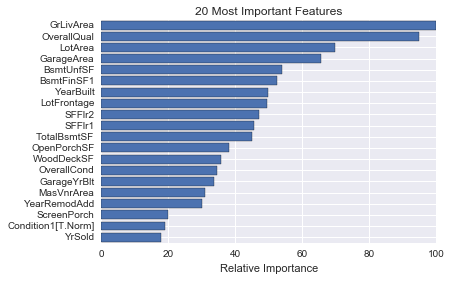

In [322]:
feature_importance = clf_house.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('20 Most Important Features')
plt.show()